In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [61]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
data = df.copy()

In [63]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [64]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [66]:
data.apply(pd.isnull).sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:
data.duplicated().sum()

0

In [68]:
data.shape

(10000, 11)

In [69]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [70]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [71]:
categorical_columns, numerical_columns = [], []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [72]:
categorical_columns

['Geography', 'Gender']

In [73]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [74]:
for column in categorical_columns:
    print(f'{column} : {data[column].value_counts()}')
    print('--------------------------------------------')

Geography : Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------
Gender : Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------


In [75]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [76]:
numerical_columns2 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

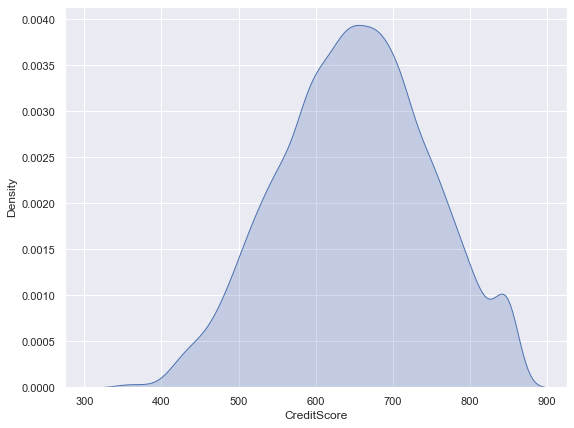

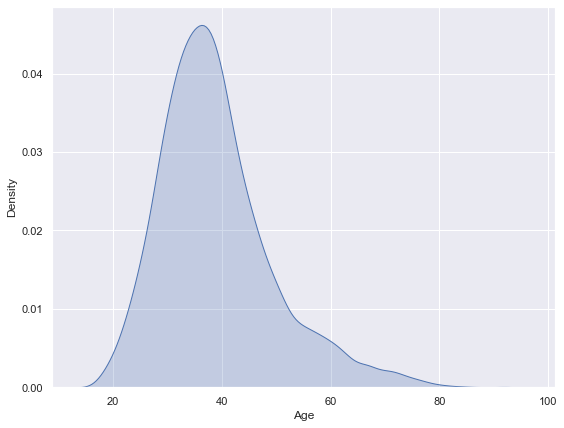

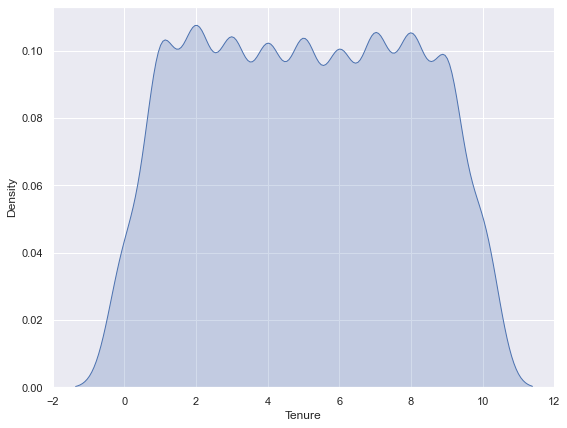

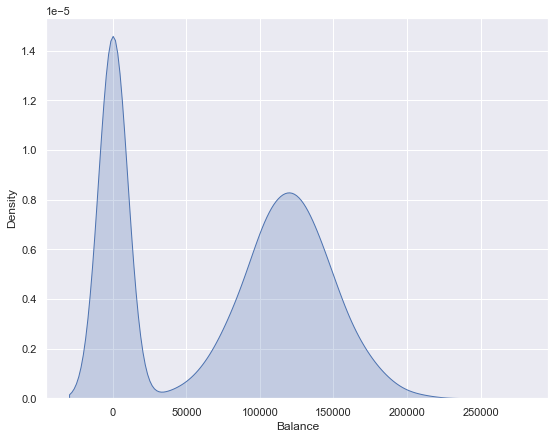

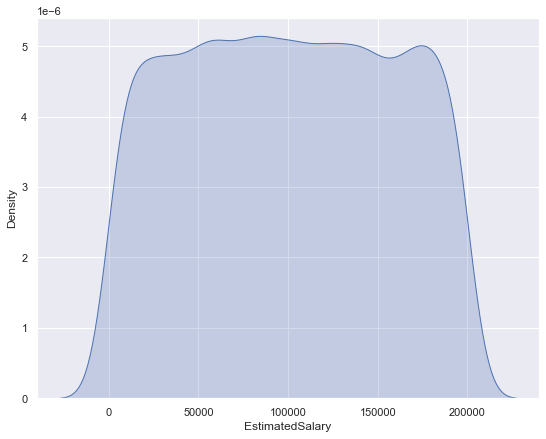

In [77]:
for column in numerical_columns2:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [78]:
q1_1 = data['CreditScore'].quantile(0.99)
q1_2 = data['CreditScore'].quantile(0.01)
data = data[data['CreditScore'] < q1_1]
data = data[data['CreditScore'] > q1_2]

In [79]:
q2_1 = data['Age'].quantile(0.99)
q2_2 = data['Age'].quantile(0.01)
data = data[data['Age'] < q2_1]
data = data[data['Age'] > q2_2]

In [80]:
q3_1 = data['Balance'].quantile(0.99)
q3_2 = data['Balance'].quantile(0.01)
data = data[data['Balance'] < q3_1]
data = data[data['Balance'] > q3_2]

In [81]:
q4_1 = data['EstimatedSalary'].quantile(0.99)
q4_2 = data['EstimatedSalary'].quantile(0.01)
data = data[data['EstimatedSalary'] < q4_1]
data = data[data['EstimatedSalary'] > q4_2]

In [82]:
data.shape

(5799, 11)

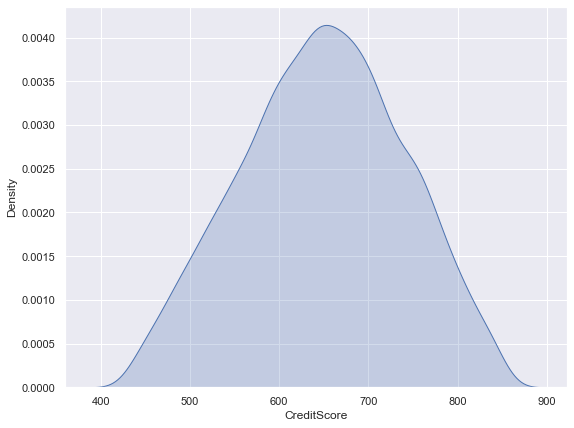

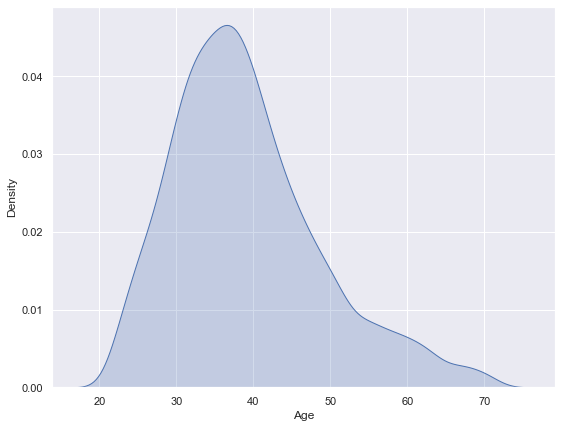

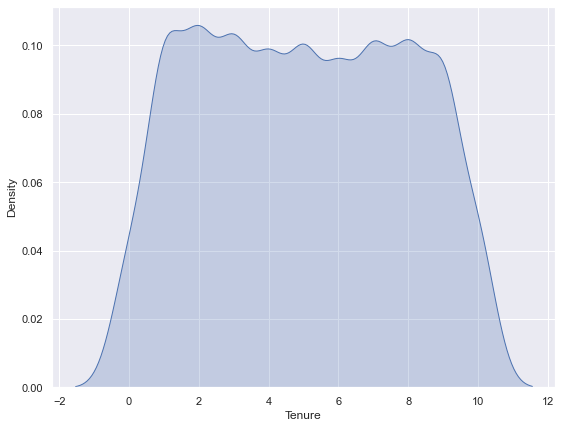

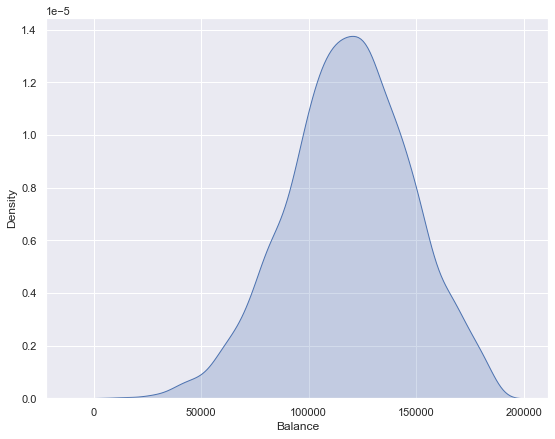

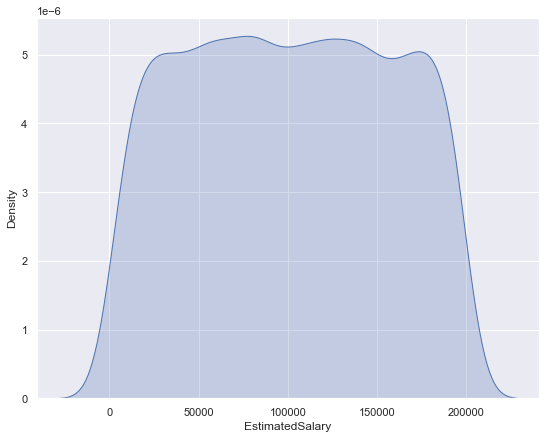

In [83]:
for column in numerical_columns2:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

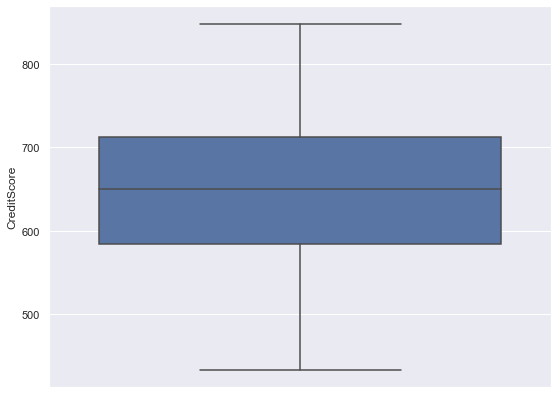

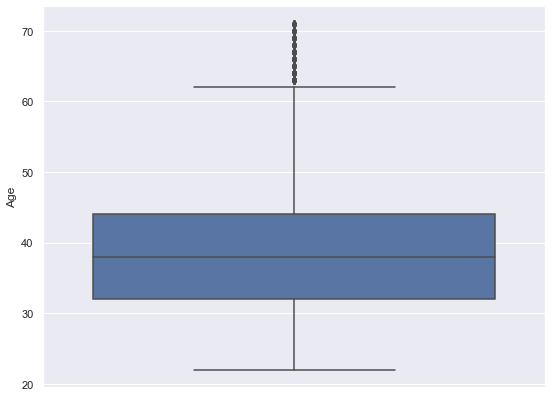

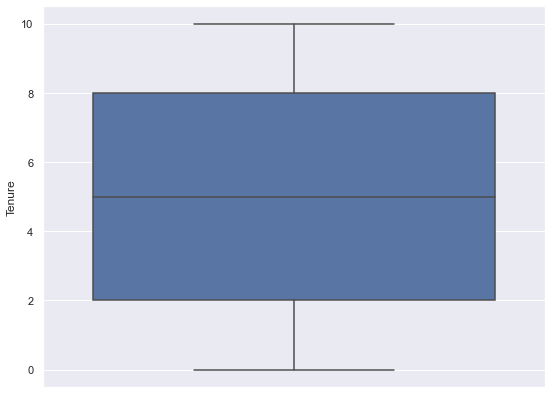

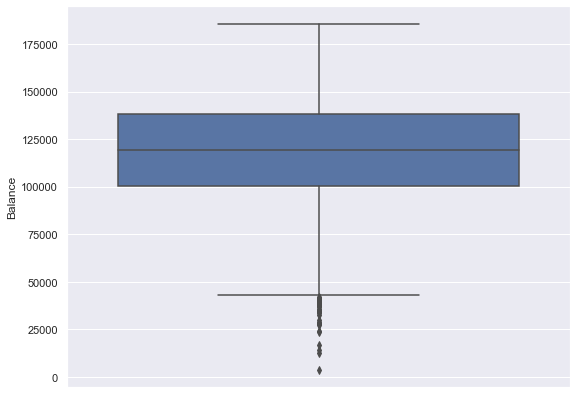

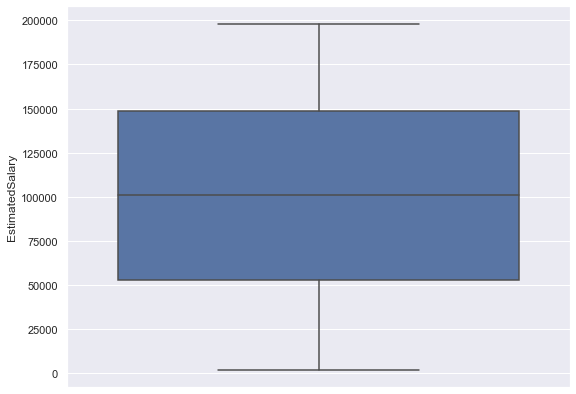

In [84]:
for column in numerical_columns2:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data, y = column)
    plt.show()

In [85]:
data[data['Age'] > 62].shape

(152, 11)

In [86]:
data = data[data['Age'] < 62]

In [87]:
data[data['Balance'] < 40000].shape

(25, 11)

In [88]:
data = data[data['Balance'] > 40000]

In [89]:
data.shape

(5589, 11)

In [90]:
data['Exited'].value_counts()

Exited
0    4264
1    1325
Name: count, dtype: int64

In [91]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000,5589.000000
mean,648.227053,38.217391,4.986581,119021.851093,1.388263,0.701557,0.502952,100806.227740,0.237073
std,90.270314,8.540724,2.906131,28070.319350,0.578404,0.457616,0.500036,56103.025311,0.425325
min,433.000000,22.000000,0.000000,40105.510000,1.000000,0.000000,0.000000,2101.890000,0.000000
25%,584.000000,32.000000,2.000000,100267.030000,1.000000,0.000000,0.000000,53072.490000,0.000000
50%,650.000000,37.000000,5.000000,119327.930000,1.000000,1.000000,1.000000,101240.080000,0.000000
75%,713.000000,43.000000,7.000000,138523.200000,2.000000,1.000000,1.000000,148611.520000,0.000000
max,849.000000,61.000000,10.000000,185734.750000,4.000000,1.000000,1.000000,198182.730000,1.000000


In [92]:
data2 = data.copy()

In [93]:
data2 = pd.get_dummies(data = data2, columns = categorical_columns, drop_first = True, dtype = 'int')

In [94]:
data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [95]:
X = data2.drop(columns = ['Exited'], axis = 'columns')
y = data2['Exited']

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
smote = SMOTE(sampling_strategy = 'not majority')
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [98]:
len(X_sm)

8528

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 101, stratify = y_sm, 
                                                   shuffle = True)

In [100]:
X_train.shape

(6822, 11)

In [101]:
X_test.shape

(1706, 11)

In [102]:
y_train.value_counts()

Exited
1    3411
0    3411
Name: count, dtype: int64

In [103]:
y_test.value_counts()

Exited
0    853
1    853
Name: count, dtype: int64

In [104]:
model1 = LogisticRegression()

In [106]:
cvs = cross_val_score(model1, X_train, y_train, cv = 5)
cvs.mean()

0.7159168788201047

In [108]:
model1.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred1 = model1.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       853
           1       0.73      0.72      0.72       853

    accuracy                           0.73      1706
   macro avg       0.73      0.73      0.73      1706
weighted avg       0.73      0.73      0.73      1706



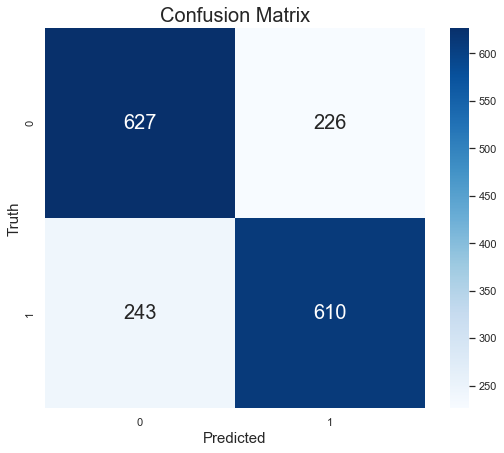

In [115]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()

In [116]:
model1.coef_

array([[-0.00465583,  0.98938048, -0.02342957,  0.05609544,  0.09964736,
         0.056805  , -0.43898036,  0.005025  ,  0.35757491,  0.00138833,
        -0.2741896 ]])

In [117]:
model1.intercept_

array([-0.31452739])

In [133]:
x1 = sm.add_constant(X_train)
model2 = sm.Logit(y_train, x1).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.558004
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6822
Model:                          Logit   Df Residuals:                     6810
Method:                           MLE   Df Model:                           11
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.1950
Time:                        05:04:09   Log-Likelihood:                -3806.7
converged:                       True   LL-Null:                       -4728.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3149      0.029    -10.808      0.000      -0.372      -0.258
x1            -0.0046      0.029     -0.159      0.873      -0.062       0.052
x2             0.9905      0.032     31.346      0.000       0.929       1.052
x3            -0.0235      0.028     -0.825      0.409      -0.079       0.032
x4             0.0562      0.029      1.932      0.053      -0.001       0.113
x5             0.0997      0.025      3.918      0.000       0.050       0.150
x6             0.0569      0.029      1.993      0.046       0.001       0.113
x7            -0.4395      0.029    -15.391      0.000      -0.495      -0.384
x8             0.0050      0.029      0.176      0.861      -0.051       0.061
x9             0.3580      0.030     11.745      0.000       0.298       0.418
x10            0.0016      0.032      0.049      0.961      -0.061       0.064
x11           -0.2745      0.028     -9.817      0.000      -0.329      -0.220
==============================================================================
"""

In [134]:
cm = model2.pred_table(threshold = 0.5)
cm

array([[2451.,  960.],
       [ 974., 2437.]])

In [135]:
cm_np = np.array(cm)
accuracy = (cm_np[0, 0] + cm_np[1, 1]) / cm_np.sum()
print('Accuracy Score for training is:', accuracy)

Accuracy Score for training is: 0.7165054236294341


In [136]:
def conf_matrix(test_data, actual_target, model):
    preds = model.predict(test_data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_target, preds, bins = bins)[0]
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    return cm, accuracy

In [137]:
X_test_t = sm.add_constant(X_test)

In [138]:
test_cm, test_accuracy = conf_matrix(X_test_t, y_test, model2)

In [139]:
test_cm

array([[627., 226.],
       [243., 610.]])

In [140]:
te_cm = pd.DataFrame(np.array(test_cm))
te_cm.columns = ['Predicted 0', 'Predicted 1']
te_cm = te_cm.rename(index = {0: 'Actual 0', 1: 'Actual 1'})

In [141]:
te_cm

,Predicted 0,Predicted 1
Actual 0,627.0,226.0
Actual 1,243.0,610.0


In [142]:
print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.7250879249706916
